In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline


### create geog of store defined in data frame from - | defined schematic, label actual aisle and others such as freezer, bakery etc.
### create item to aisle map
### match item to aisle and aggregate by aisle
### append aggregate value to store geog for mapping

In [ ]:
# symbolic representation of store layout to drive creating of dataframe defining store geog
'''
[-     -], #0
[-     -], #1
[- | | -], #2
#0 1 2 3
or 

[*********] #wall
[*  - - -*] # bakery, fishmarket, butchery
[*-     -*], #0
[*-     -*], #1
[*- | | -*], #2
[**TTTT*E*]
# 0 1 2 3
or

[**TTT**E*] # till,till, till  entrance
[*-     -*], #0
[*-     -*], #1
[*- | | -*], #2
[*  - - -*] # bakery, fishmarket, butchery
[*********]
# 0 1 2 3


'''

#starting top right top to bottom, top to bottom
'''
from first store layout template

(0,0)='aisle1'
(0,1)='aisle2'
(0,2)='aisle3'
(1,0)=None
(1,1)=None
(1,2)='freezers1'
(2,0)=None
(2,1)=None
(2,2)='aisle4'
(3,0)='aisle5'
(3,1)='aisle6'
(3,2)='aisle7'

'''

#empty space has no meaning in the layout - it is just for convenience so we can use 
#   split to easy transfer to an array and should not be used for scaling visual version of layout


In [ ]:
#item to Asile to map (could require natural language and sku/barcode version)
#could sample aisle and then use fuzzymatch / neural net to match - there will always be some data loss
#  that should be reported on

# first try fuzzy match on aisle list
# then gather product sample barcode for each aisle and use the categories and descritpions
#     to seed item allocation process

'''
aisle1=['groceries','cleaning','pet'] #input collected for ailse boards

item_df=pd.DataFrame({'category_description':['cat1','cat1','cat2','cat2']
                     ,'item_description':['desc1','desc2','desc3','desc4']
                     ,'item_barcode':['barc1','barc2','barc3','barc4']})

aislemap=item_df+item_df['aisle']
'''


In [ ]:
#item to match to aisle and aggregate - report on data lost due to none matching

#1) input item list possible with quantities and values (coudl be SKU/barcode quality descrition 
#      or human description

#2) using aislemap add aisle to item list

#3) aggregate item list by aisle together with any quantities and values supplied

#4)join aggregate dataframe to store layout dataframe

In [12]:
# test dataframe defining store layout
# need to add centre of rectangle for annotation
df=pd.DataFrame({'start_x':[0.1,0.1,0.1,0.3,0.4,0.5,0.5,0.5]
                ,'start_y':[0.1,0.2,0.3,0.1,0.1,0.1,0.2,0.3]          
                ,'height': [0.2,0.2,0.2,0.1,0.1,0.2,0.2,0.2]
                ,'width':  [0.1,0.1,0.1,0.3,0.3,0.1,0.1,0.1]},
                index=['aisle1','aisle2','aisle3','freezer1','aisle4','aisle5','aisle6','aisle7']
              )

In [37]:
# test value for shading - from matching input list to aisle and aggregating any input values on aisle
df['myValue']=[10,200,130,16,270,30,120,23]

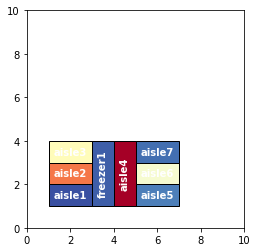

In [47]:
# visualisation of layout with aisles shaded by aggregate values
fig=plt.figure()
ax1 = fig.add_subplot(111,aspect='equal')

cm = plt.cm.get_cmap('RdYlBu_r')

for i in range(0,len(df)):
    ax1.add_patch(patches.Rectangle((df['start_x'].iloc[i]
                                     ,df['start_y'].iloc[i])
                                    ,df['height'].iloc[i]
                                    ,df['width'].iloc[i]
                                    ,edgecolor='black'
                                    ,facecolor=cm(df['myValue'].iloc[i])
                                   ,label=df.iloc[i].name));
    rot=0
    if df['width'].iloc[i]>df['height'].iloc[i]: 
        rot=90  
    ax1.annotate(df.iloc[i].name
                , (df['start_x'].iloc[i] + df['height'].iloc[i]/2.0
                , df['start_y'].iloc[i] + df['width'].iloc[i]/2.0)
                , color='w'
                , weight='bold'
                , fontsize=10
                , ha='center'
                , va='center'
                ,rotation=rot)
    
ax1.set_xlim((0, 10))
ax1.set_ylim((0, 10))
ax1.set_aspect('equal')
#report on data loss due to none matching